In [1]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import numpy as np
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
titanic_df.isna().any()


pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

Il existe des données incomplête pour les colonnes suivantes: age, fare, cabin, embarked, boat, body et home.dest

In [3]:
titanic_df["age"].isna().sum()

263

263 lignes n'ont pas l'age renseigné.

In [4]:
titanic_df["survived"].agg([np.mean, pd.Series.count, np.sum])

mean        0.381971
count    1309.000000
sum       500.000000
Name: survived, dtype: float64

Sur 1309 personnes montées à bords 500 d'entres elles ont survécu. Soit environs 38% des effectifs.

Pour la suite des opérations statistiques nous n'allons pas prendre en compte les observations où l'age n'est pas renseigné

In [5]:
titanic_df.dropna(subset = ["age"], inplace=True)

In [6]:
round(titanic_df.groupby("survived")["age"].mean(),3)


survived
0    30.545
1    28.918
Name: age, dtype: float64

L'age moyen des survivants est dond de 28.918 ans tandis que celui des personnes décédées est de 30.545

In [7]:
round(titanic_df["fare"].mean(),3)

36.686

En moyenne le ticket à couté 36.686$ par passagers

In [8]:
titanic_df["sex"].value_counts(normalize=True)

male      0.629063
female    0.370937
Name: sex, dtype: float64

Il y avait sur le bateau 62.9% d'hommes et 37% de femmes.
Voici leur répartition vis à vis de leur survie

sex
female    75.257732
male      20.516717
Name: survived, dtype: float64


Text(0, 0.5, '% de survivants')

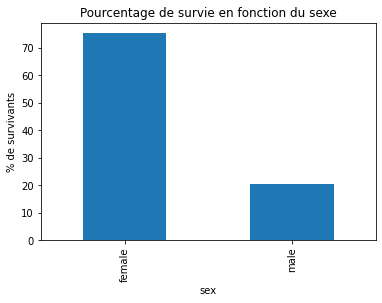

In [9]:
deces_en_fonction_du_sexe = (titanic_df.groupby("sex")["survived"].mean()*100)
print(deces_en_fonction_du_sexe)
deces_en_fonction_du_sexe.plot(kind="bar")
plt.title("Pourcentage de survie en fonction du sexe")
plt.ylabel("% de survivants")

Ainsi 75.25% des femmes ont survécu contre seulement 20.51% chez les hommes.
Ramené au nombre total de passages cela nous donne: 

In [10]:
chance_de_survie_d_un_homme = (titanic_df[titanic_df["sex"] == "male"]['survived'].value_counts()[1]/len(titanic_df))*100
chance_de_survie_d_une_femme = (titanic_df[titanic_df["sex"] == "female"]['survived'].value_counts()[1]/len(titanic_df))*100

print(round(chance_de_survie_d_un_homme,3))
print(round(chance_de_survie_d_une_femme,3))

12.906
27.916


<AxesSubplot:xlabel='age'>

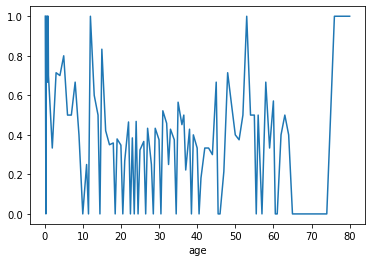

In [11]:
repartition_des_deces_en_fonction_de_l_age = titanic_df.groupby("age")["survived"].mean()
repartition_des_deces_en_fonction_de_l_age.plot(kind="line")

Etant donné la valeur continue de l'age des passagers il nous faut regrouper par tranche d'age pour plus de lisibilité.

            percent
age                
(0, 10]   58.139535
(10, 20]  39.506173
(20, 30]  37.119114
(30, 40]  42.380952
(40, 50]  39.393939
(50, 60]  48.387097
(60, 70]  22.222222
(70, 80]  33.333333


Text(0, 0.5, '% de survivants')

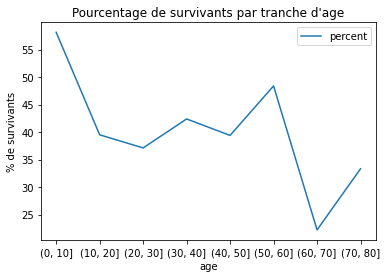

In [51]:
def percent(column):     return column.mean() *100

mort_en_fonction_de_l_age = titanic_df.groupby(pd.cut(titanic_df["age"], np.arange(0, 81,10)))["survived"].agg([percent])
print(mort_en_fonction_de_l_age)
mort_en_fonction_de_l_age.plot(kind="line")
plt.title("Pourcentage de survivants par tranche d'age")
plt.ylabel("% de survivants")

On peut voir que la répartition en tranche d'age permet plus facilement de prendre la mesure de la répartition des survivants en fonction de leur age. Ainsi à part 0-10ans qui ont eu de meilleur chance de survie et les 60-70 ans qui à l'inverse ont eu plus de décès la répartition est plutôt équitable

Voyons maintenant la même répartition mais en prenant également en compte le sexe des passagers

Text(0, 0.5, '% des survivants')

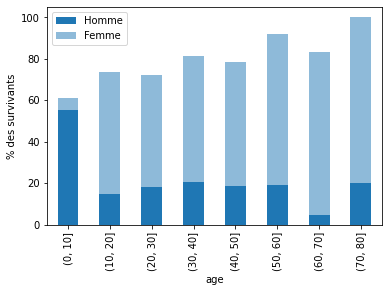

In [29]:
female_df = titanic_df[titanic_df["sex"] == "female"]
mean_survived_female_df_by_age = female_df.groupby(pd.cut(female_df["age"], np.arange(0, 81,10)))["survived"].mean() *100
male_df = titanic_df[titanic_df["sex"] == "male"]
mean_survived_male_df_by_age = male_df.groupby(pd.cut(male_df["age"], np.arange(0, 81,10)))["survived"].mean() *100
ax = mean_survived_male_df_by_age.plot(kind="bar")


mean_survived_female_df_by_age.plot(ax=ax, kind="bar", alpha=0.5)
plt.legend(["Homme","Femme"])
plt.ylabel("% des survivants")

On observe que seuls les passagers de -10ans ont eu un pourcentage de survie à peu près équivalent.
Pour les femmes ont observe que plus l'age augmente plus le pourcentage de survivants est élevé.
Pour les hommes l'age n'influence pas le nombre de survivants

In [68]:
def coin(column):     return len(column["survived"]  == 1)
male_df = titanic_df[titanic_df["sex"] == "male"]
mean_survived_male_df_by_age = male_df.groupby(pd.cut(male_df["age"], np.arange(0, 81,10)))["survived"].filter(lambda group: group.survived =1 X).agg([coin])
print(mean_survived_male_df_by_age)

SyntaxError: invalid syntax (Temp/ipykernel_4832/2854336916.py, line 3)

In [57]:
titanic_df[titanic_df["age"] <= 10].sum()

C:\Users\Tom\AppData\Local\Temp/ipykernel_4832/850077088.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_df[titanic_df["age"] <= 10].sum()


pclass                                                    228
survived                                                   50
name        Allison, Master. Hudson TrevorAllison, Miss. H...
sex         malefemalemalemalemalefemalemalefemalemalemale...
age                                                  370.1667
sibsp                                                     147
parch                                                     121
ticket      1137811137813363816966230136230136248738C.A. 3...
fare                                                2531.4998
embarked    SSSCSSSSSSSSSCCCSSSSSSSSSSSSSSSSSSSCCCCCSSSSSS...
body                                                      4.0
dtype: object